In [1]:
exec(open('letters_ns.py').read())

In [2]:
LM = make_exact_letter_model()

      #    #               #       
 #    #    #               #       
 #    ###  ###   #  ###    #   ### 
 #               #  #           #  
                 #  ###         #  
                                   


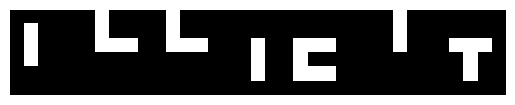

[  3   0   0   1   0   2   0   1   0   0 125]
[  3   0   0   1   0   2   0   1   0   0 125]


In [3]:
word = 'illicit'
G = make_ragged_grid(word)
print(ascii_image(G))
plt.axis('off')
plt.imshow(G, cmap='gray')
plt.show()
GM = make_exact_grid_model(G.shape[1], G.shape[0])
wc0 = [word.count(c) for c in letters]
wc0.append((G.shape[0]-2) * (G.shape[1]-2) - np.sum(wc0))
wc0 = np.array(wc0)
print(wc0)
wc1 = GM.predict(G.reshape(1,G.shape[0],G.shape[1]),verbose=0)[0]
print(np.round(wc1).astype(int))
None


In [4]:
M = make_zero_filter(6)
print(M.predict(np.array([1,2,3,4,5,0,0,0,11,0,0,6,0,0,7,0,0,42,0,0,7,0]).reshape(1,-1,1),verbose=0))

[[ 5. 11.  6.  7. 42.  7.]]


In [5]:
p = 6
M1 = make_zero_filter_alt(p)
u1 = M1.predict(np.array([0,10,0,0,100,1000]).reshape((1,-1,1)),verbose=0)[0,2*p:]
print(u1)

[  10.  100. 1000.    0.    0.    0.]


In [6]:
M = gru_model(p=6,q=20)
M.summary()

Model: "gru_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 6, 20)]              0         []                            
                                                                                                  
 reshape_3 (Reshape)         (None, 6, 20, 1)             0         ['input_5[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 4, 18, 11)            110       ['reshape_3[0][0]']           
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 1, 6, 11)             0         ['conv2d_1[0][0]']            
 D)                                                                                       

In [12]:
word = 'licit'
G = make_ragged_grid(word,20,6)
u = M.predict(G.reshape(1,6,-1),verbose=0)[0]
#M11 = tf.keras.Model(inputs = M.input, outputs = M.layers[11].output)
#u11 = M11.predict(input_grid.reshape(1,6,20),verbose=0)[0]
#M12 = tf.keras.Model(inputs = M.input, outputs = M.layers[12].output)
#u12 = M12.predict(input_grid.reshape(1,6,20),verbose=0)[0]
#M13 = tf.keras.Model(inputs = M.input, outputs = M.layers[13].output)
#u13 = M13.predict(input_grid.reshape(1,6,20),verbose=0)[0]
#print(u11)
#print(u12)
#print(u13)
print(u)


[[6. 0. 0. 0. 0. 0.]
 [6. 1. 0. 0. 0. 0.]
 [6. 1. 4. 0. 0. 0.]
 [6. 1. 4. 0. 0. 0.]
 [6. 1. 4. 1. 0. 0.]
 [6. 1. 4. 1. 8. 0.]]
